density.ipynb

Discussion: This Jupyter notebook investigates the use of density functions in Voronoi and CVT calculations.

Licensing: This code is distributed under the GNU LGPL license.
    
Modified: 07 November 2016

Author: John Burkardt, Lukas Bystricky

In [1]:
# Import necessary libraries and set plot option
%matplotlib
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import numpy as np
import matplotlib.pyplot as plt
import math
import scipy.spatial as spatial

Using matplotlib backend: agg


# Density functions #

If we want to think of a geometric region R in the plane as a physical
object, we could imagine cutting out the shape from a sheet of
cardboard.  Physical objects can have a thickness, though, and
we can apply our Voronoi techniques to some interesting problems
if we can see how to include a concept of thickness.  This will
allow us to assign more importance to some parts of the region,
corresponding to population of a country, or actual height of
a surface, or thickness of a material object.  

We can do all these things by specifying a density function, which 
we will call rho(x,y).  We will assume that rho(x,y) is positive 
in R, although we can allow it to be zero at some relatively 
small portion of R.  When a density function is involved, then
instead of the geometric centroid of R, we will want to compute
the center of mass of R.  If rho(x,y)=1 everywhere, these 
quantities are equal.

We will look at
* how sampling can estimate the center of mass of the unit triangle;
* how the center of mass of a polygon can be estimated;
* how to do a CVT in the square, including a density;
* how to do a CVT in a circle, using a density;
* how to do a CVT in a region with limited density information.

#  The center of mass #

Give a density rho(x,y), the center of mass of a region R
is the point c whose coordinates can be computed by:

  mass = integral ( x, y in R ) rho(x,y) 1 dx dy 
  c_x  = integral ( x, y in R ) rho(x,y) x dx dy / mass
  c_y  = integral ( x, y in R ) rho(x,y) y dx dy / mass


# Sample the Unit Triangle #

Let's assume our region R is the unit triangle whose vertices
are (0,0), (1,0), (0,1). 

Let's use sampling to estimate the integrals involved in the
center of mass.  

We looked at sampling any triangle in the notebook on triangles.  
Use a copy of that code, but write it so it looks like a function.
Inside the code, you can take advantage of the fact that we
know we are working with the unit triangle, so a=(0,0),
b=(1,0) and c=(0,1), which should simplify your formulas.

  def sample_unit_triangle ( m )
    import numpy as np
    x = np.zeros ( m )
    y = np.zeros ( m )
    ***
    return x, y


In [7]:
#  Code to sample the unit triangle
#
def sample_unit_triangle ( m ):
  import numpy as np

  x = np.zeros ( m )
  y = np.zeros ( m )

  for indx in range ( 0, m ):
    r1 = np.random.random ( )
    r2 = np.random.random ( )
    r2 = np.sqrt ( r2 )  
    i = 1.0 - r2
    j = ( 1.0 - r1 ) * r2
    k = r1 * r2
    x[indx] = i * 0.0 + j * 1.0 + k * 0.0
    y[indx] = i * 0.0 + j * 0.0 + k * 1.0

  return x, y
#
#  Test the sampler.
#
#  As long as x and y are nonnegative, and x+y is no greater than 1,
#  we know (x,y) is in the unit triangle.
#
#  To be sure this was a uniform sample, we would probably start
#  by looking at a plot.
#
m = 10
x, y = sample_unit_triangle ( m )
for i in range ( 0, m ):
  print ( x[i], y[i], x[i] + y[i] )

(0.16400161615777939, 0.15724452748906539, 0.32124614364684478)
(0.63557773022371977, 0.013949604880980748, 0.64952733510470051)
(0.70365932341946646, 0.13789540934603786, 0.8415547327655043)
(0.28073076097439403, 0.029818552106976034, 0.31054931308137007)
(0.57259271632859232, 0.068955676137471972, 0.64154839246606432)
(0.39988363248363873, 0.33089016579903069, 0.73077379828266942)
(0.17563429334866407, 0.80449492450978732, 0.98012921785845142)
(0.31728083867275436, 0.29719198913457812, 0.61447282780733248)
(0.20573490991629434, 0.48476002054194406, 0.6904949304582384)
(0.5561550210656333, 0.26159709989170515, 0.8177521209573384)


# Density Functions for the Unit Triangle #

Define three density functions:

  def rho1(x,y):
    value = 1.0
    return value
    
  def rho2(x,y):
    value = x
    return value
    
  def rho3(x,y):
    import numpy as np
    value = np.exp(x+y)
    return value

In [ ]:
#  Code for density functions for the unit triangle.
#
def rho1 ( x, y ):
  value = 1.0
  return value

def rho2 ( x, y ):
  value = x
  return value

def rho3 ( x, y ):
  import numpy as np
  value = np.exp ( x + y )
  return value

# Center of Mass of Unit Triangle #

Just like the centroid, we expect that the center of mass of a triangle 
will always be a point inside the triangle, never outside! 

(This will also be true for any convex polgon.)

For the uniform density rho1(x,y), we know that the center of mass
will be the same as the centroid, (1/3,1/3).

Write a function that uses sampling to estimate the center of
mass of the unit triangle with density function rho.
If we let rho be an input quantity, we can use the same function
to check densities rho1, rho2 and rho3:

  def com_unit_triangle ( m, rho ):
  ***
  return cx, cy

In [17]:
#  Code to compute the center of mass of the unit triangle.
#
def com_unit_triangle ( m, rho ):
    
  import numpy as np

  mass = 0.0
  cx = 0.0
  cy = 0.0
  x, y = sample_unit_triangle ( m )
  mass = 0.0
  cx = 0.0
  cy = 0.0
  for i in range ( 0, m ):
    r = rho ( x[i], y[i] )
    mass = mass + r
    cx = cx + r * x[i]
    cy = cy + r * y[i]
    
  cx = cx / mass
  cy = cy / mass
  return cx, cy
#
#  Test each density function.
#
m = 1000

x, y = com_unit_triangle ( m, rho1 )
print ( x, y )

x, y = com_unit_triangle ( m, rho2 )
print ( x, y )

x, y = com_unit_triangle ( m, rho3 )
print ( x, y )

(0.33955166779235257, 0.33020964809319148)
(0.50260486186261388, 0.24491141504589736)
(0.34783308521545891, 0.36469072944193692)


# CVT for the square with a density function #

Let's try to do a CVT calculation with a density function.

Our region R will be the square [-1,+1]x[-1,+1].

To estimate integrals, we still want to use uniform sampling.  Because our
region has changed slightly, we will need to compute random numbers in [0,1]
and then multiply by 2 and subtract 1, so that they lie in [-1,+1].  You might
write a function to compute M random pairs of values X and Y:

  def sample_square ( m ):
    ***
    return x, y
    
Our density function will be x^4+y^4.  Write a density function:

  def density_square ( x, y ):
    ***
    return value

# Sample the Square

It is easy to sample a square, but this time we have stretched
the square a little.  So while the random number generator will
give us a value r between 0 and 1, we need to modify r
to get x and y values between -1 and +1.  One formula for this is

  x = 2 * r - 1

Following the pattern we set for the unit triangle, let us wrap
up our sampling code into a function, which returns m random
values in our square.  However, instead of returning x and y
as separate vectors, let us return a single Mx2 array:

  def sample_unit_square ( m )
    import numpy as np
    ***
    return xy

In [ ]:
# Code to sample the square
#
def sample_square ( m ):
  import numpy as np
  xy = 2.0 * np.random.rand ( m, 2 ) - 1.0
  return xy

#
#  Test functions.
#
n = 5
g = sample_square ( n )
print ( g )

# Voronoi diagram for square #

We will want to make a Voronoi diagram from time to time
for a set of generators G.  It only takes a few lines of code,
but they are hard to remember, so let us get them right and
make them a function:
    
  def display_voronoi_square ( g ):
    ***compute and plot the Voronoi diagram of G
    return

If we work at it a little, we can add a red box that
indicates where the boundary of our square is.

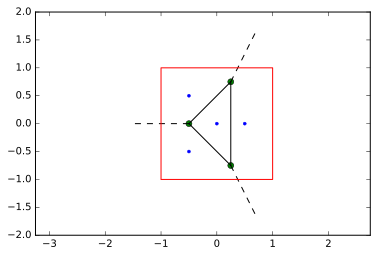

In [6]:
# Code for Voronoi diagram for square
#
def display_voronoi_square ( g ):
    
  vor = spatial.Voronoi ( g )
#
#  Because I have access to an OUTDATED copy of this code, I can't shut off
#  the idiotic vertex plotting, which ruins the plot, because some of the
#  vertices run off towards infinity!
#
# spatial.voronoi_plot_2d ( vor, show_vertices = False )
  spatial.voronoi_plot_2d ( vor )
#
#  Add a red box showing the extent of our square.
#
  plt.plot ( [-1.0, 1.0, 1.0, -1.0, -1.0 ], [ -1.0, -1.0, 1.0, 1.0, -1.0 ], 'r' )
  plt.axis ( 'Equal')

  return
#
#  Test the function.
#
import numpy as np
g = np.array ( [ \
  [ -0.5,  0.5 ], \
  [ -0.5, -0.5 ], \
  [  0.0,  0.0 ], \
  [  0.5,  0.0 ] ] )
display_voronoi_square ( g )

# Density for the square

We want an interesting density thatt will vary strongly over the
square.  The example we chose is

  rho ( x, y ) = x^4 + y^4
  
This is actually 0 at the origin, but that is OK.  We just do not
ever want to deal with negative densities, or densities that are
zero over a substantial patch of area.

Write a function that takes a variable holding M pairs of (x,y) values,
in an Mx2 array, and returns an M vector of density values:

  def density_square ( m, xy ):
    ***
    return value

In [ ]:
# Code to evaluate density for the square
#
def density_square ( m, xy ):
  d = np.zeros ( m )
  for i in range ( 0, m ):
    d[i] = xy[i,0] ** 4 + xy[i,1] ** 4
  return d

# Centers of mass for Voronoi subregions in the square

If we have a set of generators G in the square, we can compute a set of 
M sample points in an Mx2 array S.  

Each sample point S(i) is closest to one of the generators G(j).

We estimate the mass and the X and Y coordinates of the center of mass
of the subregion associated with G(j) by
* compute the density D of every point S(i) closest to G(j)
* to MASS[J] add the density 
* to COM[J,0] add the density times the x coordinate of S(i)
* to COM[J,1] add the density times the y coordinate of S(i)

If MASS[J] is not zero, normalize COM[J,0] and COM[J,1] by dividing by MASS[J].
Otherwise, set COM[J,0] and COM[J,1] to G[J,0] and G[J,1].

This is your estimate for the centers of mass of each subregion.

[[ 0.75814513 -0.83861076]
 [ 0.14320473 -0.71875152]
 [-0.20758613  0.98886831]
 [ 0.8572579  -0.90114403]
 [ 0.75881457  0.99522415]]
   0   -0.4450   -0.2846   -0.7762   -0.3497
   1    0.0533   -0.8863    0.2537   -0.8897
   2    0.9353   -0.4282    0.8355   -0.6679
   3   -0.4955   -0.9083   -0.7289   -0.8555
   4    0.5620    0.1196    0.7675    0.1555
   5    0.3949   -0.0582    0.4382   -0.1453
   6    0.7231    0.6443    0.6109    0.7888
   7   -0.8879    0.3238   -0.7159    0.7314
   8   -0.0760   -0.5029   -0.0749   -0.6203
   9   -0.9097    0.2347   -0.8697    0.0074


TypeError: from_bounds() takes exactly 4 arguments (5 given)

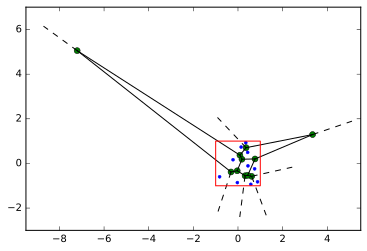

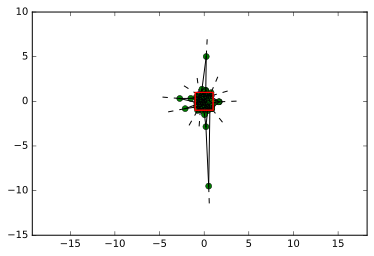

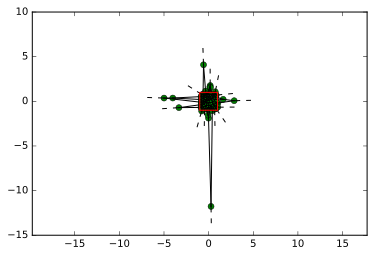

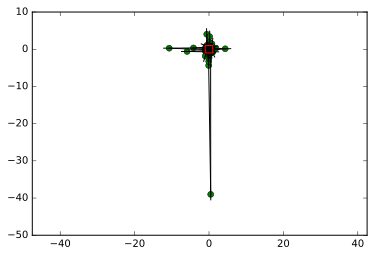

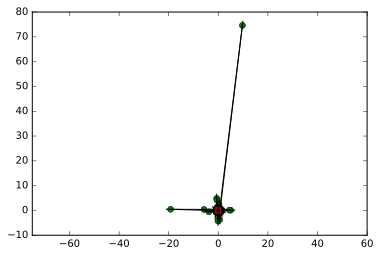

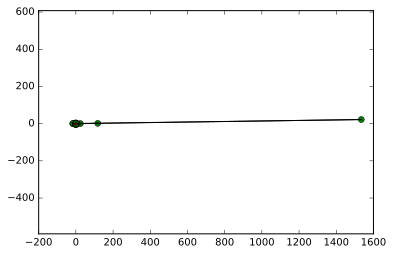

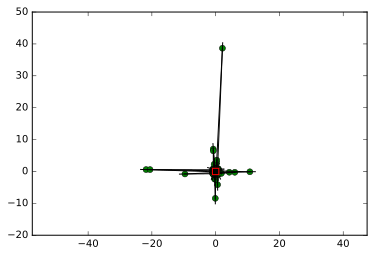

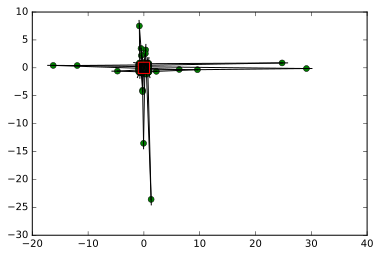

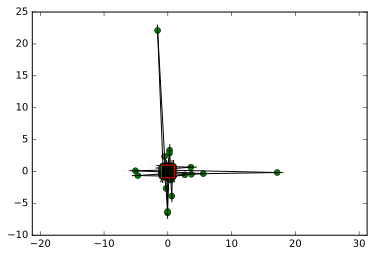

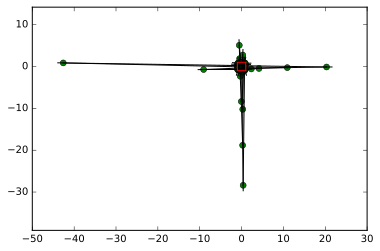

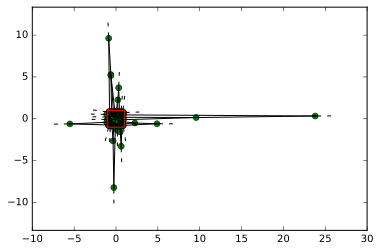

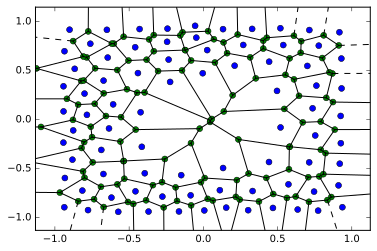

In [35]:
# Code for centers of mass of Voronoi subregions of square with density
#
def center_of_mass_square ( g, m ):

  s = sample_square ( m )
  d = density_square ( m, s )
  mass = np.zeros ( n )
  com = np.zeros ( [ n, 2 ] )

  for i in range ( 0, m ):
    jmin = -1
    dmin = np.Inf
    for j in range ( 0, n ):
      dj = np.linalg.norm ( s[i,:] - g[j,:] )
      if ( dj < dmin ):
        dmin = dj
        jmin = j
    mass[jmin] = mass[jmin] + d[i]
    com[jmin,:] = com[jmin,:] + d[i] * s[i,:]
    
  for j in range ( 0, n ):
    if ( mass[j] != 0.0 ):
      com[j,:] = com[j,:] / mass[j]
    else:
      com[j,:] = g[j,:]

  return com
#
#  Test function.
#
n = 10
g = sample_square ( n )
m = 1000
c = center_of_mass_square ( g, m )
for i in range ( 0, n ):
    print ( '  %2d  %8.4f  %8.4f  %8.4f  %8.4f' % (i, g[i,0], g[i,1], c[i,0], c[i,1] ) )

In [ ]:
#
#  Code for CVT of square with density
#

def cvt_square_nonuniform ( n, m, step_num ):
#
#  Initial G:
#
  g = sample_square ( n )
  voronoi_square ( g )

  for step in range ( 0, step_num ):
    c = center_of_mass_square ( g, m )
    g = c.copy ( )
    display_voronoi_square ( g )
#   plt.plot ( g[:,0], g[:,1], 'bo' )
#   plt.show ( )
    
  return g
#
#  Test functions.
#
#  Why don't I get axes that are equal?
#  Why do I get, somehow, the Voronoi diagram in this plot?
#
n = 80
m = 10000
step_num = 10
g = cvt_square_nonuniform ( n, m, step_num )
plt.plot ( g[:,0], g[:,1], 'bo' )
plt.axes ( 'Equal' )
plt.show ( )

#  CVT for the circle with a density function #

There are actually two ways of computing a CVT with a density function.

Way number 1:
  A) Uniformly randomly sample the region;
  B) Compute the density function at each sample point;
  C) Modify calculations using weighted averaging
  
Way number 2:
  A) Modify the sampling technique for "weighted" random sampling.
  B) The rest of the CVT algorithm behaves as though it was a uniform problem.
  
Let's try to look at the circle this way.  We know how to sample uniformly.
Instead, let's do a nonuniform sampling, like this:

def circle_nonuniform ( m )
  import numpy as np
  s = np.zeros ( [ m, 2 ] )
  r = np.random.random ( m )
  t = 2.0 * np.pi * np.random.random ( m )
  s[:,0] = r * np.cos ( t )
  s[:,1] = r * np.sin ( t )
  return s

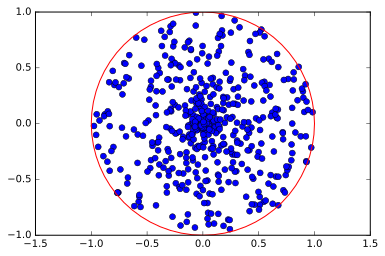

In [47]:
# Function to sample the circle nonuniformly

def circle_sample_nonuniform ( m ):
  import numpy as np
  s = np.zeros ( [ m, 2 ] )
  r = np.random.random ( m )
  t = 2.0 * np.pi * np.random.random ( m )
  s[:,0] = r * np.cos ( t )
  s[:,1] = r * np.sin ( t )
  return s
#
#  Test the function. 
#
m = 500
s = circle_sample_nonuniform ( m )
plt.plot ( s[:,0], s[:,1], 'bo' )
plt.axis ( 'Equal')
plt.axis ( [ -1.0, 1.0, -1.0, 1.0 ] )
#
#  Worthless incomprehensible MATPLOTLIB functions to draw CIRCLE can
#  be replaced by something that is tedious to write but WORKS.
#
c = np.zeros ( [65, 2 ] )
t = np.linspace ( 0, 2.0*np.pi, 65)
c[:,0] = np.cos ( t )
c[:,1] = np.sin ( t )
plt.plot ( c[:,0], c[:,1], 'r' )

[-1.0, 1.0, -1.0, 1.0]

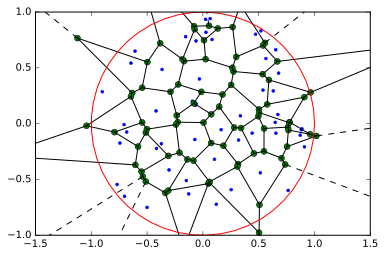

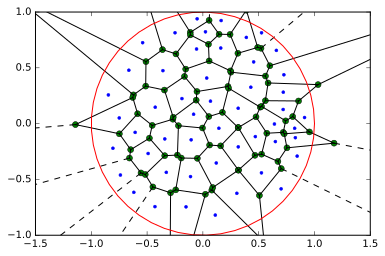

In [21]:
#  DO THE CIRCLE CVT HERE>>>>>>
#
import numpy as np
g = np.array ( [ \
  [  0.0 ,0.0 ], \
  [  0.2, 0.2 ], \
  [ -0.1, 0.3 ] ] )
#
#  Generate S, uniform random values in the unit circle.
#  THIS SHOULD BE A FUNCTION.
#
n = 50
r1 = np.random.rand ( n )
r2 = np.random.rand ( n )
r = np.sqrt ( r1 )
t = 2.0 * np.pi * r2
g = np.zeros ( [ n, 2 ] )
g[:,0] = r * np.cos ( t )
g[:,1] = r * np.sin ( t )
    
m = 5000
c = cvt_step_circle ( g, m )
#
#  Working with the Voronoi plotting function is not easy,
#  not well documented, and not very satisfactory in results.
#
t = np.linspace ( 0, 2.0 * np.pi, 50 )
xc = np.cos ( t )
yc = np.sin ( t )
vor1 = spatial.Voronoi ( g )
spatial.voronoi_plot_2d ( vor1 )
plt.plot ( xc, yc, 'r-')
plt.axis ( 'Equal')
plt.axis ( [ -1.0, 1.0, -1.0, 1.0 ] )
ax = fig.add_subplot ( 111, aspect = 'equal' )
ax.add_patch ( patches.Circle ( ( 0.0, 0.0 ), 1.0, fill = False ) )


vor2 = spatial.Voronoi ( c )
spatial.voronoi_plot_2d ( vor2 )
plt.plot ( xc, yc, 'r-')
plt.axis ( 'Equal')
plt.axis ( [ -1.0, 1.0, -1.0, 1.0 ] )